<a href="https://colab.research.google.com/github/immischein/ML-bandgap/blob/main/model_building_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Packages

In [ ]:
!pip install category_encoders

# Imports

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
import shap

import category_encoders as ce


/Users/nikodemas/Desktop/University_of_amsterdam/Academics/AMEP/2025_spring_p2/Machine_Learning/project/matgen-env-new/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



# Data Imports and Processing


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# import sys
# sys.path.append('/content/drive/MyDrive/ColabImports')

# Load the CSV file (update the path to match your local filesystem)
df = pd.read_csv('Insert path here')  # e.g., './data/bandgap_dataset_premium.csv'

# Quick check
print(df.head())

  material_id  band_gap  formula   density       volume          a          b  \
0    mp-11107    3.5226    Ac2O3  9.109130    91.511224   4.095487   4.095489   
1    mp-32800    2.2962    Ac2S3  6.535149  1118.407852  14.997851  14.997851   
2   mp-977351    3.0275    Ac2S3  5.562971   328.464893   7.619779   7.619773   
3   mp-867311    0.0794  AcAgTe2  7.997421   122.518406   5.574922   5.574922   
4  mp-1183115    4.1024   AcAlO3  8.728230    57.451413   3.858634   3.858634   

           c       alpha        beta  ...      std_am  avg_vdw  vdw_range  \
0   6.299882   90.000000   90.000000  ...  103.368761    1.900       0.95   
1  14.997851  144.742139  144.742139  ...   95.498257    2.068       0.67   
2   7.875664  118.930903   61.069136  ...   95.498257    2.068       0.67   
3   5.574922   60.000000   60.000000  ...   46.591170    2.175       0.41   
4   3.858634   90.000000   90.000000  ...   83.410543    1.774       0.95   

   max_vdw  min_vdw   std_vdw     vbm      cbm  \


In [ ]:
df.head()

,material_id,band_gap,formula,density,volume,a,b,c,alpha,beta,...,std_am,avg_vdw,vdw_range,max_vdw,min_vdw,std_vdw,vbm,cbm,bulk_modulus,shear_modulus
0,mp-11107,3.5226,Ac2O3,9.109130,91.511224,4.095487,4.095489,6.299882,90.000000,90.000000,...,103.368761,1.900,0.95,2.47,1.52,0.465403,4.5896,8.1122,"{'voigt': 106.531, 'reuss': 96.061, 'vrh': 101...","{'voigt': 42.704, 'reuss': 28.813, 'vrh': 35.758}"
1,mp-32800,2.2962,Ac2S3,6.535149,1118.407852,14.997851,14.997851,14.997851,144.742139,144.742139,...,95.498257,2.068,0.67,2.47,1.80,0.328232,4.8014,7.0976,NaN,NaN
2,mp-977351,3.0275,Ac2S3,5.562971,328.464893,7.619779,7.619773,7.875664,118.930903,61.069136,...,95.498257,2.068,0.67,2.47,1.80,0.328232,2.9069,5.9344,NaN,NaN
3,mp-867311,0.0794,AcAgTe2,7.997421,122.518406,5.574922,5.574922,5.574922,60.000000,60.000000,...,46.591170,2.175,0.41,2.47,2.06,0.171537,5.9961,6.0755,NaN,NaN
4,mp-1183115,4.1024,AcAlO3,8.728230,57.451413,3.858634,3.858634,3.858634,90.000000,90.000000,...,83.410543,1.774,0.95,2.47,1.52,0.369410,6.8036,10.9060,NaN,NaN


In [ ]:
# To test script: load dummy data

#from sklearn.datasets import fetch_openml

# Load a regression dataset from OpenML
#data = fetch_openml(name="house_prices", as_frame=True)  # Ames housing data
#df = data.frame

# Rename target to match our script
#df = df.rename(columns={"SalePrice": "band_gap"})

In [ ]:
df.head()

,material_id,band_gap,formula,density,volume,a,b,c,alpha,beta,...,std_am,avg_vdw,vdw_range,max_vdw,min_vdw,std_vdw,vbm,cbm,bulk_modulus,shear_modulus
0,mp-11107,3.5226,Ac2O3,9.109130,91.511224,4.095487,4.095489,6.299882,90.000000,90.000000,...,103.368761,1.900,0.95,2.47,1.52,0.465403,4.5896,8.1122,"{'voigt': 106.531, 'reuss': 96.061, 'vrh': 101...","{'voigt': 42.704, 'reuss': 28.813, 'vrh': 35.758}"
1,mp-32800,2.2962,Ac2S3,6.535149,1118.407852,14.997851,14.997851,14.997851,144.742139,144.742139,...,95.498257,2.068,0.67,2.47,1.80,0.328232,4.8014,7.0976,NaN,NaN
2,mp-977351,3.0275,Ac2S3,5.562971,328.464893,7.619779,7.619773,7.875664,118.930903,61.069136,...,95.498257,2.068,0.67,2.47,1.80,0.328232,2.9069,5.9344,NaN,NaN
3,mp-867311,0.0794,AcAgTe2,7.997421,122.518406,5.574922,5.574922,5.574922,60.000000,60.000000,...,46.591170,2.175,0.41,2.47,2.06,0.171537,5.9961,6.0755,NaN,NaN
4,mp-1183115,4.1024,AcAlO3,8.728230,57.451413,3.858634,3.858634,3.858634,90.000000,90.000000,...,83.410543,1.774,0.95,2.47,1.52,0.369410,6.8036,10.9060,NaN,NaN


In [ ]:
# Data inspection

print("Data shape:", df.shape)

missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing values per column:")
for col, n in missing.items():
    print(f"{col}: {n}")

display(df.describe())

Data shape: (82998, 40)
Missing values per column:
formula: 1
avg_en: 9
max_en: 9
min_en: 9
std_en: 9
vbm: 876
cbm: 876
bulk_modulus: 79092
shear_modulus: 79092


,band_gap,density,volume,a,b,c,alpha,beta,gamma,n_atoms,...,max_am,min_am,std_am,avg_vdw,vdw_range,max_vdw,min_vdw,std_vdw,vbm,cbm
count,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,...,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82122.000000,82122.000000
mean,1.984421,4.061805,668.913474,7.669236,8.044636,11.280915,86.028830,88.065828,89.700249,42.406058,...,110.699981,17.901714,31.772083,1.769480,0.787753,2.316020,1.528267,0.290510,1.585835,3.591381
std,1.560981,1.717274,693.624420,3.177138,2.800604,6.822619,17.420383,15.977789,22.074143,40.632079,...,57.428377,18.988597,20.400828,0.193034,0.380579,0.355453,0.203977,0.132925,2.238984,2.214685
min,0.000000,0.020144,11.286588,2.363000,2.363000,2.395898,3.664087,5.397478,5.397478,1.000000,...,1.007940,1.007940,0.000000,1.100000,0.000000,1.100000,1.100000,0.000000,-14.222600,-7.360600
25%,0.653400,2.913572,254.760639,5.553544,6.015389,7.389807,77.756958,88.952439,86.976837,16.000000,...,55.845000,6.941000,15.265807,1.666000,0.540000,2.070000,1.520000,0.207338,0.166850,2.368150
50%,1.728450,3.773981,452.574159,7.012094,7.718989,9.712402,90.000000,90.000000,90.000000,29.000000,...,106.420000,15.999400,26.508649,1.729333,0.720000,2.230000,1.520000,0.267822,1.629350,3.660450
75%,3.013225,4.954535,841.664286,8.965331,9.328646,13.157808,90.000000,90.000000,99.717832,54.000000,...,151.964000,15.999400,45.960918,1.855000,0.970000,2.430000,1.520000,0.348872,2.952475,4.974900
max,17.891400,18.889325,20090.906408,46.210701,61.125585,211.425839,169.783994,169.783994,168.048246,444.000000,...,244.000000,227.000000,107.897541,3.430000,2.330000,3.430000,3.430000,1.165000,12.376100,14.341400


In [ ]:
# Drop columns that are prohibited

df = df.drop(columns='vbm')
df = df.drop(columns='cbm')
df = df.drop(columns='formula')
df = df.drop(columns='material_id')

In [ ]:
# Specify your band gap values
df = df[(df['band_gap'] >= 1.5) & (df['band_gap'] <= 5)]
display(df.describe())

,band_gap,density,volume,a,b,c,alpha,beta,gamma,n_atoms,...,std_ie,avg_am,max_am,min_am,std_am,avg_vdw,vdw_range,max_vdw,min_vdw,std_vdw
count,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000,...,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000,41716.000000
mean,2.859066,3.950848,721.972883,7.896203,8.150494,11.751423,85.249097,87.810863,90.725520,48.719820,...,3.123699,38.641337,113.260444,15.203931,32.697523,1.747003,0.854044,2.346139,1.492095,0.311779
std,0.918140,1.598629,667.000921,3.212637,2.698124,7.506834,16.699524,15.335758,21.811760,45.307871,...,0.950294,23.092446,56.775143,14.428560,20.662995,0.183613,0.378709,0.368905,0.190788,0.133124
min,1.500000,0.039581,11.286588,2.363000,2.363000,2.423140,5.200300,5.397478,5.397478,1.000000,...,0.000000,1.007940,1.007940,1.007940,0.000000,1.100000,0.000000,1.100000,1.100000,0.000000
25%,2.081500,2.883335,287.186845,5.714789,6.215707,7.557907,76.975262,89.544250,89.774681,20.000000,...,2.599945,22.526561,58.693400,6.941000,14.952165,1.658750,0.590000,2.070000,1.520000,0.225673
50%,2.726900,3.570018,505.375296,7.309519,7.937347,9.910582,90.000000,90.000000,90.000000,34.000000,...,3.198028,30.970514,114.818000,15.999400,28.168125,1.727778,0.770000,2.270000,1.520000,0.292462
75%,3.527500,4.782825,931.427617,9.044636,9.258297,13.808922,90.000000,90.000000,103.312835,64.000000,...,3.624853,49.865508,158.925350,15.999400,47.562118,1.823333,1.010000,2.490000,1.520000,0.367310
max,5.000000,14.034039,6901.604446,38.788312,52.349372,211.425839,169.113919,169.113919,168.048246,444.000000,...,6.385444,208.980400,238.028910,208.980400,106.490195,2.996667,2.330000,3.430000,2.230000,1.165000


# Define features and target

In [ ]:
target_column = "band_gap"
X = df.drop(columns=[target_column])
y = df[target_column]

# Seperate numeric and categorical columns

numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocessing

In [ ]:
# To decide: drop columns with >65% missing values (can be lower, based on this dummy dataset)

threshold = 0.65
missing_frac = df.isnull().mean()
cols_to_drop = missing_frac[missing_frac > threshold].index

print(f"Dropping columns with >{int(threshold*100)}% missing values:")
print(list(cols_to_drop))

df = df.drop(columns=cols_to_drop)

# To decide: impute missing numerical values with mean, categorical features with most frequent value
# StandardScaler subtracts mean and divides by std
# Use onehotencoder for categorical features


# Split into train and test sets BEFORE preprocessing
X = df.drop("band_gap", axis=1)   # Replace "target" with your actual target column name
y = df["band_gap"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Target Encoding on training set only
te_col = "spacegroup_number "
te_encoder = ce.TargetEncoder(cols=[te_col])
X_train[te_col] = te_encoder.fit_transform(X_train[te_col], y_train)
X_test[te_col] = te_encoder.transform(X_test[te_col])

# Proceed with rest of pre-processing pipeline
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Dropping columns with >65% missing values:
['bulk_modulus', 'shear_modulus']


# Define the models to compare

In [ ]:
models = {
    "Dummy": DummyRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42,  n_estimators=50, max_depth=10, n_jobs=-1)

}

# Model training

In [ ]:
# train models
print("\nCross-validated MAE (5-fold):")
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    scores = cross_val_score(pipeline, X_train, y_train,
                             scoring="neg_mean_absolute_error", cv=5)
    print(f"{name}: MAE = {-np.mean(scores):.3f}")


Cross-validated MAE (5-fold):
Dummy: MAE = 0.774
Linear Regression: MAE = 0.698
Ridge Regression: MAE = 0.698
Random Forest: MAE = 0.553


# Evaluate model


Test set performance:
Dummy: MAE = 0.778, R² = -0.000
Linear Regression: MAE = 0.706, R² = 0.145
Ridge Regression: MAE = 0.706, R² = 0.145
Random Forest: MAE = 0.559, R² = 0.421


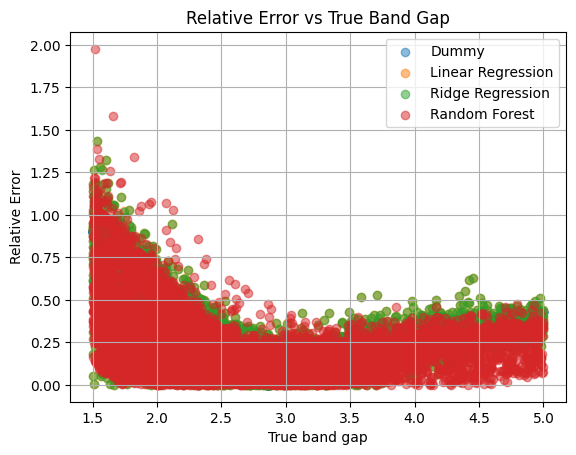

In [ ]:
# Fit on full training set and evaluate on test set

results = {}
print("\nTest set performance:")
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"mae": mae, "r2": r2}

    print(f"{name}: MAE = {mae:.3f}, R² = {r2:.3f}")

    # Plot MAE vs true value
    relative_error = np.abs(y_pred - y_test) / y_test
    plt.scatter(y_test, relative_error, label=name, alpha=0.5)

    #plt.scatter(y_test, np.abs(y_pred - y_test), label=name, alpha=0.5)

plt.xlabel("True band gap")
plt.ylabel("Relative Error")
plt.title("Relative Error vs True Band Gap")
plt.legend()
plt.grid(True)
plt.show()


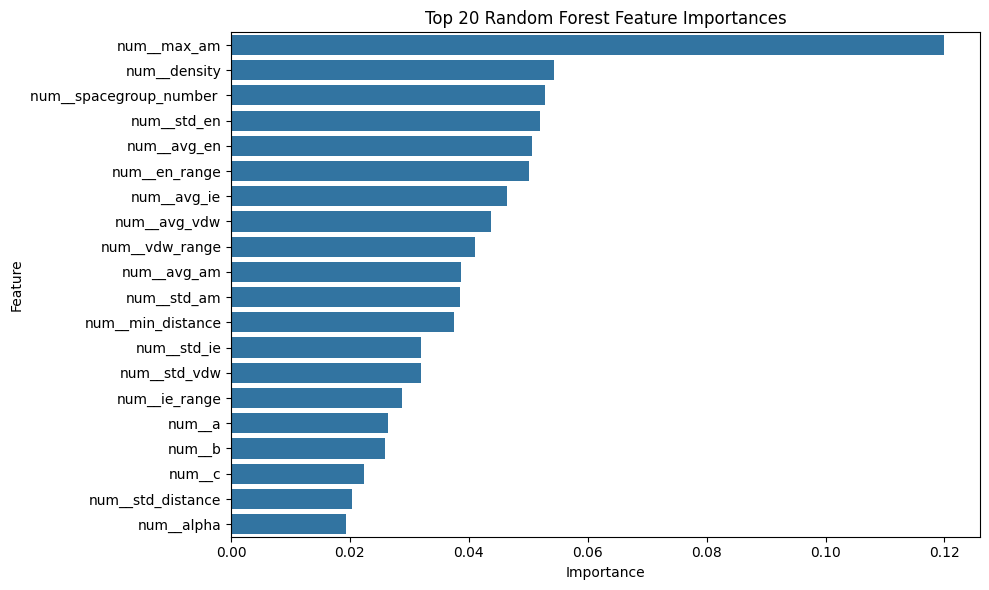

In [ ]:
# Feature importance of tree based model
rf_model = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))
rf_model.fit(X_train, y_train)

importances = rf_model.named_steps["randomforestregressor"].feature_importances_

# Get feature names from the preprocessor
feature_names = rf_model.named_steps["columntransformer"].get_feature_names_out()

# Sort by importance
sorted_idx = np.argsort(importances)[::-1][:20]
top_features = np.array(feature_names)[sorted_idx]
top_importances = importances[sorted_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title("Top 20 Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
# # Feature importance using SHAP
# rf = rf_model.named_steps["randomforestregressor"]
# X_transformed = rf_model.named_steps["columntransformer"].transform(X_test)

# if hasattr(X_transformed, "toarray"):
#     X_transformed = X_transformed.toarray()

# feature_names = rf_model.named_steps["columntransformer"].get_feature_names_out()

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_transformed)

# shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)


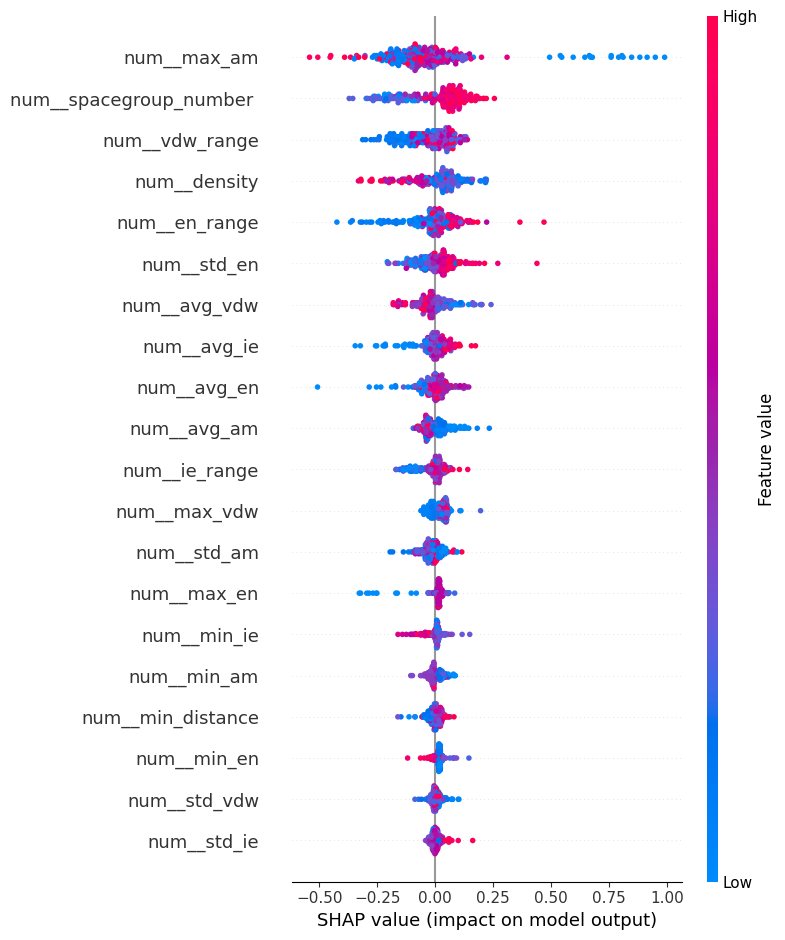

In [ ]:
# Using a faster SHAP explainer
rf = rf_model.named_steps["randomforestregressor"]

# Sample fewer rows for faster explanation
X_sample = X_test.sample(250, random_state=42)

# Transform using your pipeline
X_transformed = rf_model.named_steps["columntransformer"].transform(X_sample)

# Only convert if needed
if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

# Get feature names
feature_names = rf_model.named_steps["columntransformer"].get_feature_names_out()

# Use SHAP's auto-detect explainer (faster in new versions)
explainer = shap.Explainer(rf)

# Compute SHAP values
shap_values = explainer(X_transformed)

# Summary plot
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)


# Deep Learning Code

### Multilayer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Model training
mlp = MLPRegressor(hidden_layer_sizes=(500, 50),
                   batch_size=32,
                   learning_rate_init=0.001,
                   activation='relu',
                   solver='adam',
                   max_iter=500,
                   random_state=42,
                   early_stopping=True,
                   validation_fraction=0.01,
                   verbose=True)

mlp.fit(X_train_processed, y_train)

Iteration 1, loss = 0.37742946
Validation score: 0.195802
Iteration 2, loss = 0.31253260
Validation score: 0.259736
Iteration 3, loss = 0.29713756
Validation score: 0.298002
Iteration 4, loss = 0.28542159
Validation score: 0.272317
Iteration 5, loss = 0.27569568
Validation score: 0.328093
Iteration 6, loss = 0.26854493
Validation score: 0.325395
Iteration 7, loss = 0.26117132
Validation score: 0.368677
Iteration 8, loss = 0.25594138
Validation score: 0.360854
Iteration 9, loss = 0.24943358
Validation score: 0.334535
Iteration 10, loss = 0.24538853
Validation score: 0.337898
Iteration 11, loss = 0.24163311
Validation score: 0.326585
Iteration 12, loss = 0.23594698
Validation score: 0.310540
Iteration 13, loss = 0.23236987
Validation score: 0.358737
Iteration 14, loss = 0.22746243
Validation score: 0.401143
Iteration 15, loss = 0.22530117
Validation score: 0.319246
Iteration 16, loss = 0.22119439
Validation score: 0.351631
Iteration 17, loss = 0.21789245
Validation score: 0.404954
Iterat

MLPRegressor(batch_size=32, early_stopping=True, hidden_layer_sizes=(500, 50),
             max_iter=500, random_state=42, validation_fraction=0.01,
             verbose=True)

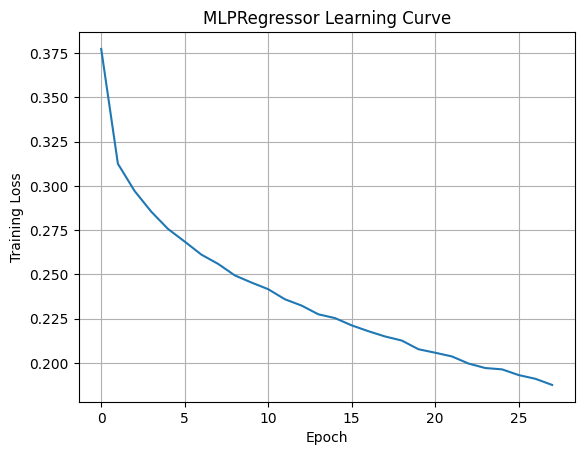

In [ ]:
# Plot learning curve
plt.plot(mlp.loss_curve_)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("MLPRegressor Learning Curve")
plt.grid(True)
plt.show()

In [ ]:
# Evaluate performance
y_pred_sklearn = mlp.predict(X_test_processed)

mae = mean_absolute_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)
mse = mean_squared_error(y_test, y_pred_sklearn)
rmse = np.sqrt(mse)

print(f"[MLPRegressor]")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


[MLPRegressor]
MAE:  0.5634
RMSE: 0.7093
R²:   0.4080


### Deep Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_processed.toarray()
                              if hasattr(X_train_processed, "toarray")
                              else X_train_processed, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_processed.toarray()
                             if hasattr(X_test_processed, "toarray")
                             else X_test_processed, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
# Define model
class DeepRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)

        )

    def forward(self, x):

        return self.net(x)

model = DeepRegressor(X_train_tensor.shape[1])


In [ ]:
# Train model and register learning curve
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []
n_epochs = 10000

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred_train = model(X_train_tensor)
    loss = criterion(y_pred_train, y_train_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor)

    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss={loss.item():.4f}, Test Loss={test_loss.item():.4f}")

Epoch 0: Train Loss=9.4410, Test Loss=8.9876
Epoch 10: Train Loss=5.6684, Test Loss=5.2692
Epoch 20: Train Loss=2.5011, Test Loss=2.2435
Epoch 30: Train Loss=1.6603, Test Loss=1.6802
Epoch 40: Train Loss=1.3727, Test Loss=1.3319
Epoch 50: Train Loss=1.1763, Test Loss=1.1613
Epoch 60: Train Loss=1.0808, Test Loss=1.0669
Epoch 70: Train Loss=1.0215, Test Loss=1.0162
Epoch 80: Train Loss=0.9757, Test Loss=0.9702
Epoch 90: Train Loss=0.9428, Test Loss=0.9382
Epoch 100: Train Loss=0.9152, Test Loss=0.9134
Epoch 110: Train Loss=0.8924, Test Loss=0.8928
Epoch 120: Train Loss=0.8724, Test Loss=0.8745
Epoch 130: Train Loss=0.8545, Test Loss=0.8584
Epoch 140: Train Loss=0.8382, Test Loss=0.8438
Epoch 150: Train Loss=0.8230, Test Loss=0.8302
Epoch 160: Train Loss=0.8086, Test Loss=0.8172
Epoch 170: Train Loss=0.7943, Test Loss=0.8044
Epoch 180: Train Loss=0.7796, Test Loss=0.7912
Epoch 190: Train Loss=0.7647, Test Loss=0.7778
Epoch 200: Train Loss=0.7501, Test Loss=0.7651
Epoch 210: Train Loss=0.

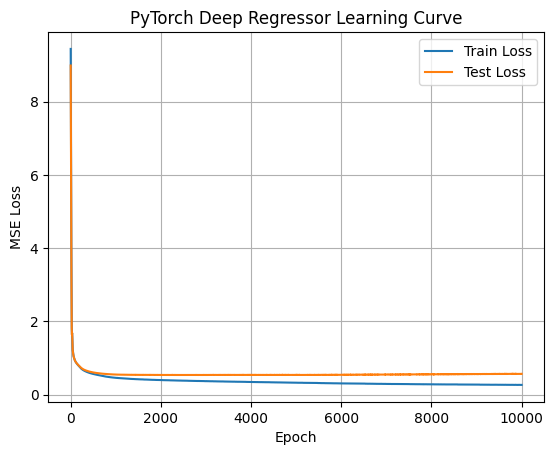

In [ ]:
# Plot learning curves
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("PyTorch Deep Regressor Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate model
y_pred_torch = y_pred_test.numpy()

mae_torch = mean_absolute_error(y_test, y_pred_torch)
mse_torch = mean_squared_error(y_test, y_pred_torch)
rmse_torch = np.sqrt(mse_torch)
r2_torch = r2_score(y_test, y_pred_torch)

print(f"[PyTorch Model]")
print(f"MAE:  {mae_torch:.4f}")
print(f"RMSE: {rmse_torch:.4f}")
print(f"R²:   {r2_torch:.4f}")

[PyTorch Model]
MAE:  0.5734
RMSE: 0.7518
R²:   0.3351


### Even Deeper Network

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_processed.toarray()
                              if hasattr(X_train_processed, "toarray")
                              else X_train_processed, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_processed.toarray()
                             if hasattr(X_test_processed, "toarray")
                             else X_test_processed, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
class DeepRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(  # Define the network layers
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2), # Drops 20% of neurons randomly during training

            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2), # Drops 20% of neurons randomly during training

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 16),
            nn.ReLU(),

            nn.Linear(16, 1)  # Output layer (no activation for regression)
        )

    def forward(self, x):
        return self.net(x)

model2 = DeepRegressor(X_train_tensor.shape[1])

#### Run code on GPU

In [ ]:

if torch.backends.mps.is_available():
    device = torch.device("mps")  # Use Metal GPU on Mac
elif torch.cuda.is_available():
    device = torch.device("cuda")  # Use NVIDIA GPU (not on Mac usually)
else:
    device = torch.device("cpu")  # Fallback

print("Using device:", device)

model2.to(device)
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

print(X_train_tensor.device)
print(y_train_tensor.device)

Using device: mps
mps:0
mps:0


In [ ]:
# Train model and register learning curve
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

train_losses = []
test_losses = []
n_epochs = 5000

for epoch in range(n_epochs):
    model2.train()
    optimizer.zero_grad()
    y_pred_train = model2(X_train_tensor)
    loss = criterion(y_pred_train, y_train_tensor)
    loss.backward()
    optimizer.step()

    model2.eval()
    with torch.no_grad():
        y_pred_test = model2(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor)

    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss={loss.item():.4f}, Test Loss={test_loss.item():.4f}")

Epoch 0: Train Loss=9.1052, Test Loss=9.0515
Epoch 10: Train Loss=8.2258, Test Loss=7.9739
Epoch 20: Train Loss=3.3661, Test Loss=2.7176
Epoch 30: Train Loss=1.7881, Test Loss=1.5506
Epoch 40: Train Loss=1.4563, Test Loss=1.3384
Epoch 50: Train Loss=1.2253, Test Loss=1.1393
Epoch 60: Train Loss=1.1109, Test Loss=1.0439
Epoch 70: Train Loss=1.0458, Test Loss=0.9832
Epoch 80: Train Loss=0.9951, Test Loss=0.9391
Epoch 90: Train Loss=0.9552, Test Loss=0.9025
Epoch 100: Train Loss=0.9241, Test Loss=0.8709
Epoch 110: Train Loss=0.8933, Test Loss=0.8439
Epoch 120: Train Loss=0.8657, Test Loss=0.8190
Epoch 130: Train Loss=0.8438, Test Loss=0.7968
Epoch 140: Train Loss=0.8270, Test Loss=0.7771
Epoch 150: Train Loss=0.8061, Test Loss=0.7598
Epoch 160: Train Loss=0.7927, Test Loss=0.7451
Epoch 170: Train Loss=0.7804, Test Loss=0.7320
Epoch 180: Train Loss=0.7684, Test Loss=0.7213
Epoch 190: Train Loss=0.7618, Test Loss=0.7120
Epoch 200: Train Loss=0.7488, Test Loss=0.7036
Epoch 210: Train Loss=0.

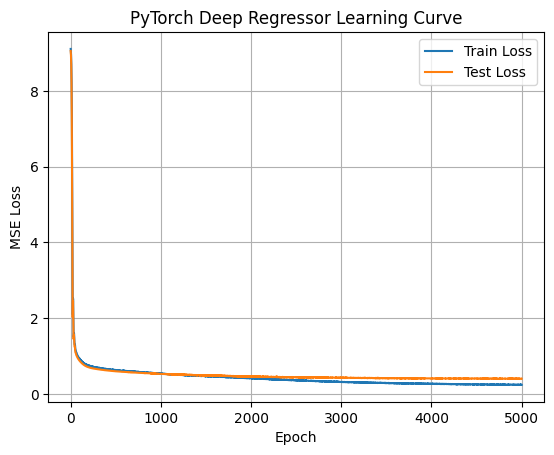

In [ ]:
# Plot learning curves
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("PyTorch Deep Regressor Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate model
y_pred_torch = y_pred_test.detach().to("cpu").numpy()

mae_torch = mean_absolute_error(y_test, y_pred_torch)
mse_torch = mean_squared_error(y_test, y_pred_torch)
rmse_torch = np.sqrt(mse_torch)
r2_torch = r2_score(y_test, y_pred_torch)

# mae_torch = mean_absolute_error(y_test, y_pred_torch)
# mse_torch = mean_squared_error(y_test, y_pred_torch)
# rmse_torch = np.sqrt(mse_torch)
# r2_torch = r2_score(y_test, y_pred_torch)

print(f"[PyTorch Model]")
print(f"MAE:  {mae_torch:.4f}")
print(f"MSE: {mse_torch:.4f}")
print(f"RMSE: {rmse_torch:.4f}")
print(f"R²:   {r2_torch:.4f}")

[PyTorch Model]
MAE:  0.4717
MSE: 0.4035
RMSE: 0.6352
R²:   0.5253


In [ ]:
# print size of y_pred_torch
print(y_test)

12018    2.0689
20125    1.8303
63550    2.0093
53573    1.9444
11913    1.8209
          ...  
56524    2.5672
1234     1.7846
38062    2.5632
67534    2.1592
76006    1.8789
Name: band_gap, Length: 8344, dtype: float64


In [ ]:
# residuals = y_test - y_pred_torch.flatten()

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=y_pred_torch.flatten(), y=residuals)
# plt.axhline(0, linestyle='--', color='red')
# plt.xlabel('Predicted')
# plt.ylabel('Residuals')
# plt.title('Residuals vs. Predicted')
# plt.grid(True)
# plt.show()


In [ ]:
# plt.figure(figsize=(8, 6))
# sns.histplot(residuals, kde=True)
# plt.title('Distribution of Residuals')
# plt.xlabel('Residual')
# plt.grid(True)
# plt.show()


#### Posibly Add Weight Initialization

In [ ]:
# def init_weights(m):
#     if isinstance(m, nn.Linear):
#         nn.init.kaiming_normal_(m.weight)
#         if m.bias is not None:
#             nn.init.zeros_(m.bias)

# model2.apply(init_weights)

In [ ]:
# summarize all models by mae values
print("\nTest set performance:")
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"mae": mae, "r2": r2}

    print(f"{name}: MAE = {mae:.3f}, R² = {r2:.3f}")
# Add PyTorch model results
results["PyTorch"] = {"mae": mae_torch, "r2": r2_torch}

print("\nTest set performance with PyTorch Deep model:")
for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['mae']:.3f}, R² = {metrics['r2']:.3f}")

print(f"[MLPRegressor]")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")



Test set performance:
Dummy: MAE = 0.778, R² = -0.000
Linear Regression: MAE = 0.706, R² = 0.145
Ridge Regression: MAE = 0.706, R² = 0.145
Random Forest: MAE = 0.559, R² = 0.421

Test set performance with PyTorch Deep model:
Dummy: MAE = 0.778, R² = -0.000
Linear Regression: MAE = 0.706, R² = 0.145
Ridge Regression: MAE = 0.706, R² = 0.145
Random Forest: MAE = 0.559, R² = 0.421
PyTorch: MAE = 0.472, R² = 0.525
[MLPRegressor]
MAE:  0.5591
RMSE: 0.7093
R²:   0.4215
